# Задание 2

Результаты измерений: {'10': 1024}


<IPython.core.display.Math object>

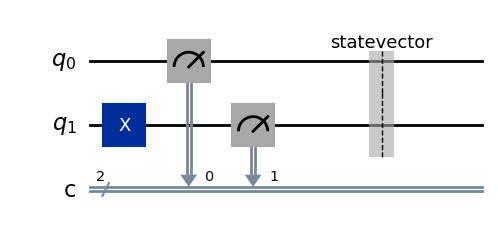

In [48]:
import math

import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math

qc = QuantumCircuit(2, 2)

qc.x(1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.save_statevector()

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()

counts = result.get_counts(qc)
print("Результаты измерений:", counts)

psi = result.get_statevector()
latex_str = array_to_latex(psi, prefix="|psi> = \n")
display(Math(latex_str.data))

qc.draw(output='mpl')

# Задание 3
### Выводы
При малом числе выполнений (например, 1 или 2) результаты могут быть случайными и не отражать истинную вероятность. По мере увеличения числа выполнений распределение результатов будет стремиться к равномерному, отражая равные вероятности измерения $|0⟩$ и $|1⟩$, что соответствует состоянию суперпозиции

In [49]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(1, 1)

qc.h(0)
qc.measure(0, 0)

simulator = AerSimulator()
shots_list = [1, 2, 8, 32, 64, 128, 512, 1024, 8192]

all_counts = {}
for shots in shots_list:
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts(qc)
    print(f"Результаты измерений для {shots} выполнений:", counts)

Результаты измерений для 1 выполнений: {'0': 1}
Результаты измерений для 2 выполнений: {'1': 2}
Результаты измерений для 8 выполнений: {'1': 6, '0': 2}
Результаты измерений для 32 выполнений: {'0': 16, '1': 16}
Результаты измерений для 64 выполнений: {'1': 34, '0': 30}
Результаты измерений для 128 выполнений: {'1': 64, '0': 64}
Результаты измерений для 512 выполнений: {'0': 263, '1': 249}
Результаты измерений для 1024 выполнений: {'1': 513, '0': 511}
Результаты измерений для 8192 выполнений: {'0': 4157, '1': 4035}


# Задание 4
Первый код - пункт а)
Второй код - пункт б)

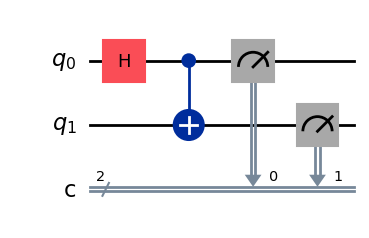

In [50]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

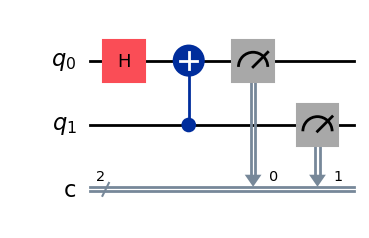

In [51]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output='mpl')

# Задание 5
### Выводы
Результаты измерений показывают, что распределение состояний кубитов после выполнения схемы близко к равномерному. Это ожидаемо, так как схема включает в себя операции, приводящие кубиты в состояние суперпозиции.
Во втором случае также заметим, что мы измерили лишь один кубит. Про второй кубит нам ничего не известно. И соответственно распределение равномерное будет между двумя значениями - 0 и 1.

Результаты измерений для 512 выполнений: {'00': 126, '11': 129, '10': 132, '01': 125}


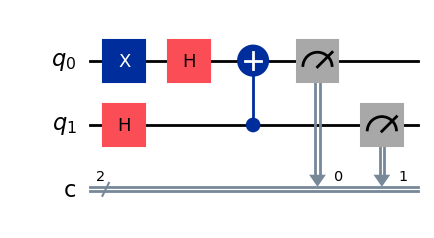

In [52]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(1)
qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)
qc.measure(1, 1)

simulator = AerSimulator()
result = simulator.run(qc, shots=512).result()
counts = result.get_counts(qc)
print("Результаты измерений для 512 выполнений:", counts)

qc.draw(output='mpl')

Результаты измерений для 512 выполнений: {'00': 234, '01': 278}


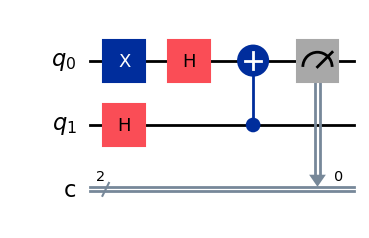

In [53]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.h(1)
qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)

simulator = AerSimulator()
result = simulator.run(qc, shots=512).result()
counts = result.get_counts(qc)
print("Результаты измерений для 512 выполнений:", counts)

qc.draw(output='mpl')

# Задание 6



In [54]:
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

def simulate_with_shots(qc, shots):
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts(qc)
    print(f"Результаты измерений для {shots} выполнений:", counts)

Результаты измерений для 1024 выполнений: {'0': 1024}


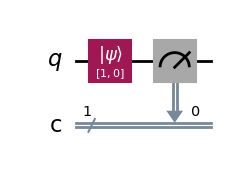

In [55]:
qc_a = QuantumCircuit(1, 1)
qc_a.initialize([1, 0], 0)
state_a = Statevector.from_instruction(qc_a)
qc_a.measure(0, 0)
simulate_with_shots(qc_a, 1024)
qc_a.draw(output='mpl')

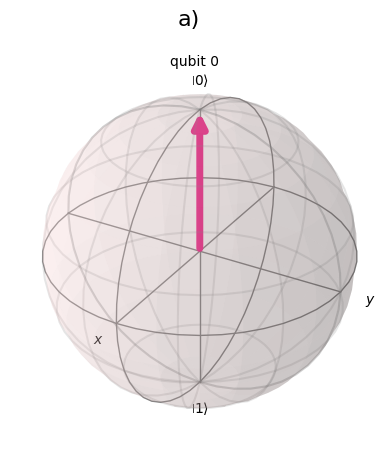

In [56]:
plot_bloch_multivector(state_a, title='a)')

Результаты измерений для 1024 выполнений: {'1': 1024}


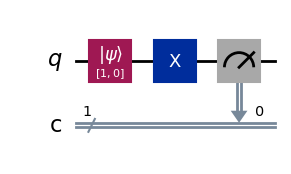

In [57]:
qc_b = QuantumCircuit(1, 1)
qc_b.initialize([1, 0], 0)
qc_b.x(0)
state_b = Statevector.from_instruction(qc_b)
qc_b.measure(0, 0)
simulate_with_shots(qc_b, 1024)
qc_b.draw(output='mpl')

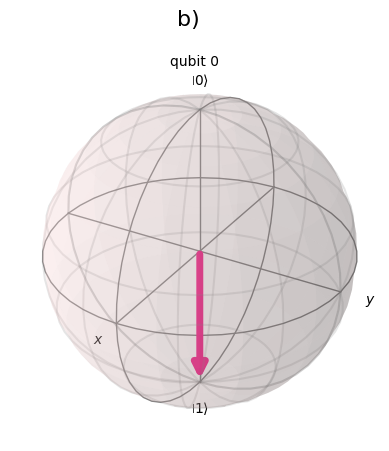

In [58]:
plot_bloch_multivector(state_b, title='b)')

Результаты измерений для 1024 выполнений: {'0': 504, '1': 520}


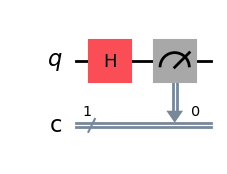

In [59]:
qc_c = QuantumCircuit(1, 1)
qc_c.h(0)
state_c = Statevector.from_instruction(qc_c)
qc_c.measure(0, 0)
simulate_with_shots(qc_c, 1024)
qc_c.draw(output='mpl')

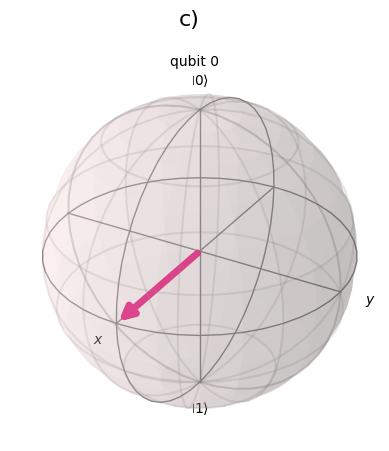

In [60]:
plot_bloch_multivector(state_c, title='c)')

Результаты измерений для 1024 выполнений: {'0': 528, '1': 496}


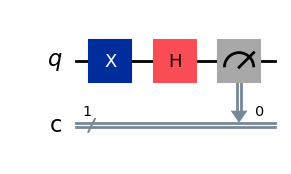

In [61]:
qc_d = QuantumCircuit(1, 1)
qc_d.x(0)
qc_d.h(0)
state_d = Statevector.from_instruction(qc_d)
qc_d.measure(0, 0)
simulate_with_shots(qc_d, 1024)
qc_d.draw(output='mpl')

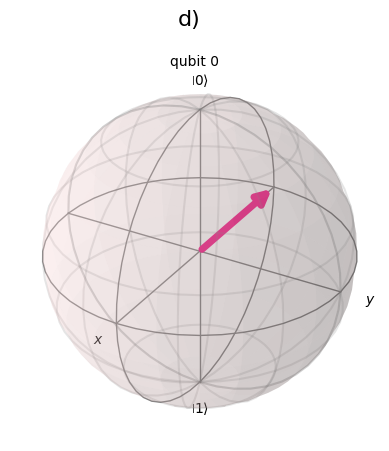

In [62]:
plot_bloch_multivector(state_d, title='d)')

Результаты измерений для 1024 выполнений: {'0': 776, '1': 248}


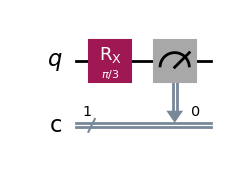

In [63]:
import math

qc_e = QuantumCircuit(1, 1)
qc_e.rx(math.pi/3, 0)
state_e = Statevector.from_instruction(qc_e)
qc_e.measure(0, 0)
simulate_with_shots(qc_e, 1024)
qc_e.draw(output='mpl')

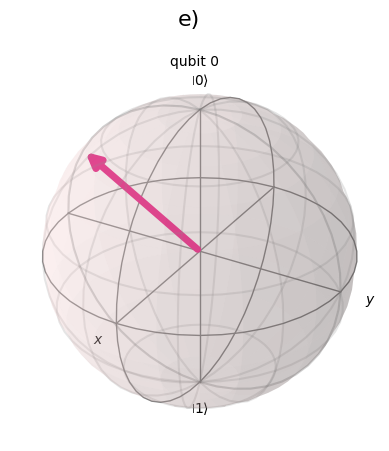

In [64]:
plot_bloch_multivector(state_e, title='e)')

Результаты измерений для 1024 выполнений: {'1': 768, '0': 256}


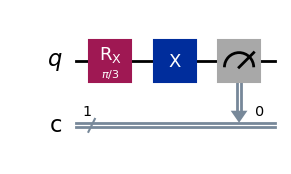

In [65]:
qc_f = QuantumCircuit(1, 1)
qc_f.rx(math.pi/3, 0)
qc_f.x(0)
state_f = Statevector.from_instruction(qc_f)
qc_f.measure(0, 0)
simulate_with_shots(qc_f, 1024)
qc_f.draw(output='mpl')

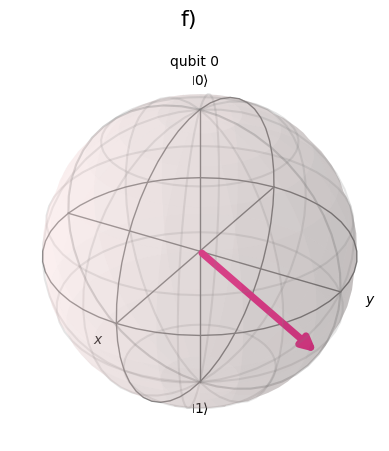

In [66]:
plot_bloch_multivector(state_f, title='f)')